# DA 350 SP23 Lab 1 - Inventory Policies
![Whits](https://images.squarespace-cdn.com/content/v1/5e765b4c27758651114287b9/1617400033301-52U5D518SOMY95Q1YNFM/Sugar+Cookie+Whitser+v2-1.png?format=1000w)

## General Lab Instructions: 
For lab assignments I will provide you the .ipynb file and associated data sets (if any) on Canvas.  Please use this .ipynb file as a starting point and write your code and fill in your answers directly in the notebook.  I will ask specific questions in <b> bolded font </b>.  For written answers, please create the cell as a Markdown type so the text displays neatly.  For code, comment sufficiently so I can understand your process.  Please try to delete unnecessary, old code so it is easy for me to evluate.

## Lab 1:
In this lab you will pose as consultants to help Whit's decide how much custard they should create and stock on a given day.  Produce too little, and they lose potential sales and turn away customers.  Produce too much, and it may spoil and they have to throw it out.  You will explore the connection between predictive and prescriptive analytics and see how the latter can help make decisions like inventory stocking.

Note: The methods presented in this lab are not necessarily the best way to solve the problem.  There may exist analytical formulations of the problem which could let us mathematically solve exactly without the need for computation.  This lab is intended to introduce the differences between predictive and prescriptive analytics, and demonstrate one way (even if not mathematically the most elegant) to find optimal decisions.

In [ ]:
#Import packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

<b>1) First read in Whit's sales data as a pandas data frame using the pd.read_csv function.</b>

In [ ]:
#Write your code/answer to 1) in this cell
whit_sale = pd.read_csv('Whits_sales_data.csv')
whit_sale

,Day,Sales
0,1,32
1,2,49
2,3,42
3,4,59
4,5,30
...,...,...
95,96,26
96,97,36
97,98,41
98,99,35


Each row of the sales data represents the number of gallons of custard sold on that day.

<b> 2) Fit a normal distribution to the sales data using the scipy.stats.norm.fit() python function.  What are the fitted mean and variance of the distribution? </b>
You can read about the norm function in the scipy library here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [ ]:
#Write your code/answer to 2) in this cell
from scipy.stats import norm
norm.fit(whit_sale['Sales'])

(39.49, 8.337259741665724)

<b> 3) Plot the data and the fitted normal curve - how strongly or weakly do the sales data fit a normal distribution? </b>
The top answer in https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data gives a simple way to plot the histogram of data and the fitted curve.

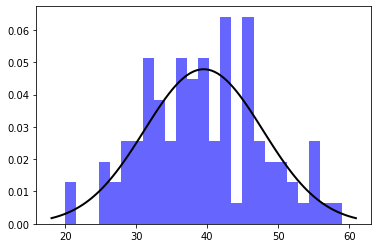

In [ ]:
# Generate some data for this demonstration.
data = whit_sale['Sales']

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

<b> 4) What is your best estimate of the sales on any given day? </b> 

$39.49$ sale

Two common parameters in inventory policy decisions are the <i> holding cost h</i> and <i> underage cost u</i>.  The holding cost represents economic costs associated with keeping an item in inventory and not selling it for some unit of time.  It can account for costs of warehousing or storage, lost opportunity to display or sell other products, depreciation, wasteage, and more.  The underage cost represents economic costs associated with not having a unit for sale when demand arises.  It can account for lost profit, reduction in brand value, and potential lost future sales.  It is generally assumed these costs accrue at the end of the day and are on a per-unit basis.  For example, if Whit's sold all the custard they stocked in a day but had 3 demand they could not fulfill, they would accrue 3<i>u</i> cost, or if they met all demand but had 2 custard left over they would accrue 2<i>h</i> cost.

<b> 5) What factors should be accounted for into estimating the holding and underage costs of Whit's?  How could you collect data to estimate these? </b>

The factor that should be accounted for into estimating the holding cost of Whits is inventory costs, electrical cost for keeping the Whits cool, ... and the way to collect the data is to 

For simplicity and consistency, assume we follow your above suggestions and estimate h = \\$3 per gallon per day, and u = \$7 per gallon per day.

<b> 6) If our demand estimate from 4) was 100% accurate and the demand on a given day was deterministic with no randomness, how much ice cream should Whit's stock on a day?  What would be the associated holding and underage costs? </b>

If our demand estimate from 4) was 100% accurate and the demand on a given day was deterministic with no randomness, Whit's stock should be 39.49 on a day associated 0 ```holding cost``` and 0 ```underage costs```.

If this situation of deterministic demand held, we would be done, with no need for prescriptive analytics!  However, in the real world we will always have randomness, and that is where prescriptive analytics can step in.  One way we can approximate the real world randomness is through <i> simulation </i>.  We will learn much more about simulation later in the semester, for now we will use a simple example.  

<b> 7) Generate 1000 random draws from the normal distribution you fit in 2) using the np.random.normal function of python.  We will imagine these are the demands on 1000 consecutive days.  Use a for-loop to calculate the average holding costs, underage costs, and total costs (holding plus underage) for inventory policies that would stock 20,21, ..., 60 gallons of custard on a day.</b>  You will likely need 2 nested for-loops: the outer loop operates over the 41 inventory levels, the inner loop assess the holding cost and underage cost on each of the 1000 days then averages.  Your final result should be a 41x4 table: each row is a potential inventory stock level, and the 4 columns are the stock level and each of the 3 costs. 

In [ ]:
import statistics
s = np.random.normal(statistics.mean(whit_sale['Sales']), statistics.stdev(whit_sale['Sales']), 1000)
stock_levels = []
holding_costs = []
underage_costs = []
total_costs = []    
off_hc = []
off_tc = []
off_uc = []
for stock_level in range(20, 61):
    holding_cost = 0
    underage_cost = 0
    total_cost = 0
    for demand in s:
        if demand > stock_level:
            holding_cost = 0
            underage_cost = (demand - stock_level) *7
        elif demand < stock_level:
            holding_cost = (stock_level - demand) * 3
            underage_cost = 0
        else:
            holding_cost = 0
            underage_cost = 0
        total_cost = holding_cost + underage_cost
        holding_costs.append(holding_cost)
        stock_levels.append(stock_level)
        underage_costs.append(underage_cost)
        total_costs.append(total_cost)
for i in range(0, len(holding_costs), 1000):
    hc = holding_costs[i:i+1000]
    uc = underage_costs[i:i+1000]
    tc = total_costs[i:i+1000]
    meanhc = np.mean(hc)
    meanuc = np.mean(uc)
    meantc = np.mean(tc)
    off_hc.append(meanhc)
    off_uc.append(meanuc)
    off_tc.append(meantc)
stock_levels = [i for i in range(20,61)]
df = pd.DataFrame({'Stock level':stock_levels, 'Holding cost': off_hc, 'Underage cost': off_uc, 'Total cost': off_tc})
print(pd.DataFrame(df))

    Stock level  Holding cost  Underage cost  Total cost
0            20      0.130825     132.285095  132.415920
1            21      0.202315     125.451904  125.654219
2            22      0.287423     118.650489  118.937912
3            23      0.390407     111.890787  112.281194
4            24      0.520920     105.195317  105.716237
5            25      0.678900      98.563936   99.242836
6            26      0.864008      91.995855   92.859862
7            27      1.093561      85.531478   86.625039
8            28      1.372836      79.183121   80.555958
9            29      1.698038      72.941924   74.639962
10           30      2.106580      66.895191   69.001771
11           31      2.615735      61.083219   63.698954
12           32      3.219749      55.492584   58.712332
13           33      3.927997      50.145164   54.073161
14           34      4.723751      45.001921   49.725672
15           35      5.635334      40.128950   45.764284
16           36      6.650881  

<b> 8) According to your table from 7), how much inventory should Whit's stock to minimize total costs? What are the associated holding and underage costs, and why are they not equal? </b>

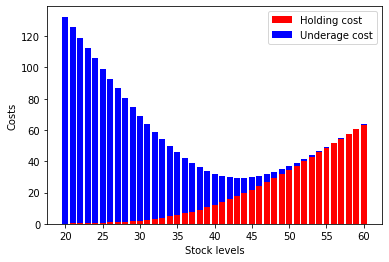

In [ ]:
x = [i for i in range(20,61)]
y1 = np.array(off_hc)
y2 = np.array(off_uc)

plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xlabel("Stock levels")
plt.ylabel("Costs")
plt.legend(["Holding cost", "Underage cost"])
plt.show()

According to your table from ```7)```, Whit should stock at level $44$ to minimize total costs, which is $29.43$, associated at $19.6$ ```underage costs``` and $9.8$ ```holding cost```. 

Associated back to the question ```5)``` that for simplicity and consistency, assume we follow your above suggestions and estimate h = $\$3$ per gallon per day, and u = $\$7$ per gallon per day, because the disparity between the base price has caused the price to be difference at lowest total price. Furthermore, taking the data from table ```7)```, if taking ```holding cost``` at stock level $44$ divided by ```holding cost``` at base cost \& if taking ```underage cost``` at stock level $44$ divided by ```underage cost``` at base cost, we will got $$19.6/7=2.8 ≈ 3$$$$9.8/3=3.2 ≈ 3$$, which takes the nearly same amount of day to get the lowest total cost.

<b> 9) Compare and contrast your answers to 6) and 8).  Why are the answers different, and which do we trust more? </b>

The answer from ```6)``` says that if our demand estimate from 4) was 100% accurate and the demand on a given day was deterministic with no randomness, Whit's stock should be 39.49 on a day associated 0 ```holding cost``` and 0 ```underage costs```, while the answer from ```8)``` is at ```stock level``` $44$ associated at $19.6$ ```underage costs``` and $9.8$ ```holding cost```. Because the answer from 6) is on a much smaller scale compare to 8) and at 6) we are considering the best senario (was 100% accurate and the demand on a given day was deterministic with no randomness), while 8) has a large amount of data and 100% randomness. We trust the simulation more, as the simulation is on a much bigger scalea and randomess, which is not always at its best senario.

<b> 10) Now assume we collected additional data to better inform demand predictions, such as temperature.  We know custard sales should be positively correlated with temperature (how many people eat custard when it's 20 degrees out!?).  How could you adapt steps 2), 7), and 8) to make use of this additional temperature data?  Propose specific methods. </b>

I would run the ```holding-undergae-total cost``` on a range of temperature by adding 1 for loop and call a recursion of the code in ```7)``` in that way, we will have the distribution, the lowest stock level at every temperature that we intend to run. From then we find the corrolation between the temperature and the lowest stock level to see which has the smallest $R^{2}$ .

<b> 11) What are some other contexts inventory management problems like this might arise?  Give examples of other situations that might face similar problems. </b>

Some senario such has a competitive that sell ice cream in the same street with a lower price, and in this case, we would run the sell in range the default price to the base price, to see which one has higher customer and decent amount of income, but still can beat the other ice cream shop, or when the price of the component rises, we have to run a simulation if we can keep the current price or we have to raise the price, and how many customer will we lose if we raise in a range amount.